# Getting started with LSTM example code


Developed based on this tutorial: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

## Example dataset

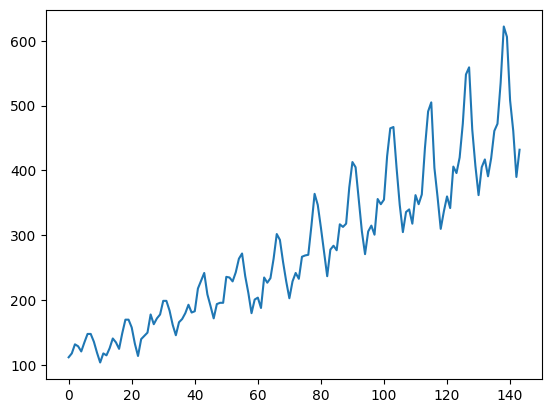

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

## LSTMs for Univariate Time Series Forecasting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2025-05-06 01:22:55.963752: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 01:22:55.964769: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 01:22:55.967814: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 01:22:55.976023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746494575.990597    5959 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746494575.99

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [15]:
# load the dataset
dataframe = pd.read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [16]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [17]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [18]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/home/vmadmin/workspace/sepsis_predictor/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 8ms/step - loss: 0.0374
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0178
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0137
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0124
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0113
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0103
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0093
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0083
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0074
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0065
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0057
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0050
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0044
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0038
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0033
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0030
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0027
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0025
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0023
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0022
Epoch 21/100
94/94 - 

In [29]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Train Score: 22.65 RMSE
Test Score: 54.05 RMSE


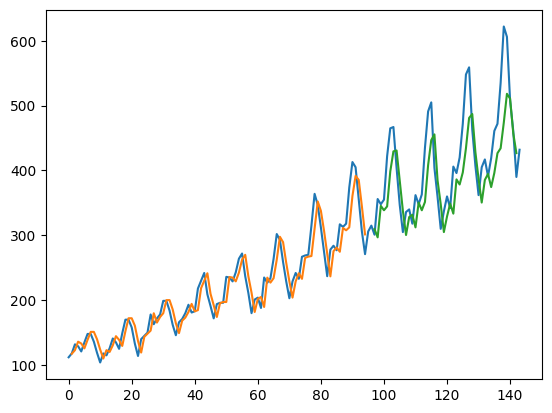

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM for Regression Using the Window Method

Epoch 1/100


/home/vmadmin/workspace/sepsis_predictor/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 11ms/step - loss: 0.0468
Epoch 2/100
92/92 - 0s - 1ms/step - loss: 0.0224
Epoch 3/100
92/92 - 0s - 1ms/step - loss: 0.0143
Epoch 4/100
92/92 - 0s - 1ms/step - loss: 0.0121
Epoch 5/100
92/92 - 0s - 1ms/step - loss: 0.0108
Epoch 6/100
92/92 - 0s - 1ms/step - loss: 0.0097
Epoch 7/100
92/92 - 0s - 1ms/step - loss: 0.0085
Epoch 8/100
92/92 - 0s - 1ms/step - loss: 0.0075
Epoch 9/100
92/92 - 0s - 1ms/step - loss: 0.0066
Epoch 10/100
92/92 - 0s - 1ms/step - loss: 0.0059
Epoch 11/100
92/92 - 0s - 1ms/step - loss: 0.0053
Epoch 12/100
92/92 - 0s - 1ms/step - loss: 0.0048
Epoch 13/100
92/92 - 0s - 1ms/step - loss: 0.0044
Epoch 14/100
92/92 - 0s - 1ms/step - loss: 0.0042
Epoch 15/100
92/92 - 0s - 1ms/step - loss: 0.0040
Epoch 16/100
92/92 - 0s - 1ms/step - loss: 0.0038
Epoch 17/100
92/92 - 0s - 1ms/step - loss: 0.0037
Epoch 18/100
92/92 - 0s - 1ms/step - loss: 0.0036
Epoch 19/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 20/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 21/100
92/92 -

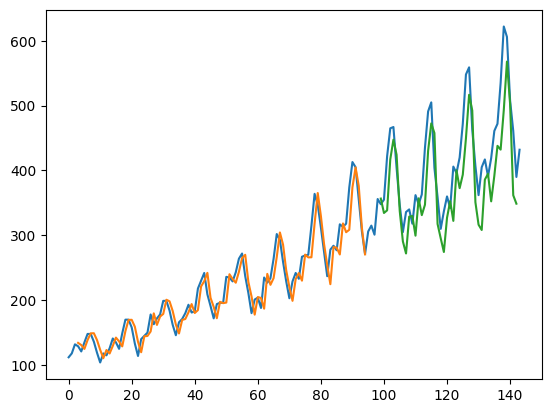

In [51]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
trainX.shape

(92, 1, 3)

## LSTM for Regression with Time Steps

Epoch 1/100


/home/vmadmin/workspace/sepsis_predictor/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 8ms/step - loss: 0.0577
Epoch 2/100
92/92 - 0s - 1ms/step - loss: 0.0247
Epoch 3/100
92/92 - 0s - 1ms/step - loss: 0.0194
Epoch 4/100
92/92 - 0s - 1ms/step - loss: 0.0175
Epoch 5/100
92/92 - 0s - 1ms/step - loss: 0.0159
Epoch 6/100
92/92 - 0s - 1ms/step - loss: 0.0145
Epoch 7/100
92/92 - 0s - 1ms/step - loss: 0.0131
Epoch 8/100
92/92 - 0s - 1ms/step - loss: 0.0118
Epoch 9/100
92/92 - 0s - 1ms/step - loss: 0.0106
Epoch 10/100
92/92 - 0s - 1ms/step - loss: 0.0094
Epoch 11/100
92/92 - 0s - 1ms/step - loss: 0.0083
Epoch 12/100
92/92 - 0s - 1ms/step - loss: 0.0072
Epoch 13/100
92/92 - 0s - 1ms/step - loss: 0.0063
Epoch 14/100
92/92 - 0s - 1ms/step - loss: 0.0055
Epoch 15/100
92/92 - 0s - 1ms/step - loss: 0.0050
Epoch 16/100
92/92 - 0s - 1ms/step - loss: 0.0046
Epoch 17/100
92/92 - 0s - 1ms/step - loss: 0.0043
Epoch 18/100
92/92 - 0s - 1ms/step - loss: 0.0042
Epoch 19/100
92/92 - 0s - 1ms/step - loss: 0.0041
Epoch 20/100
92/92 - 0s - 1ms/step - loss: 0.0040
Epoch 21/100
92/92 - 

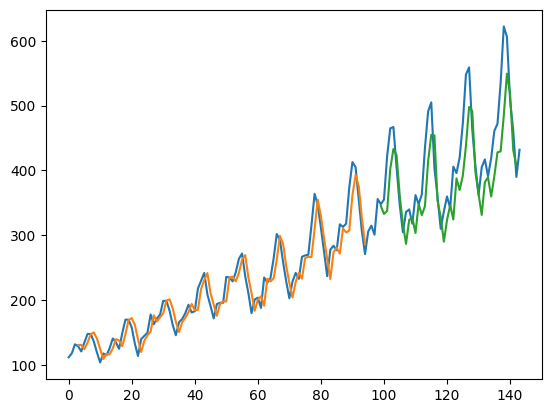

In [53]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
trainX.shape

(92, 3, 1)

## LSTM with Memory Between Batches

92/92 - 1s - 10ms/step - loss: 0.0232
92/92 - 0s - 1ms/step - loss: 0.0109
92/92 - 0s - 1ms/step - loss: 0.0114
92/92 - 0s - 1ms/step - loss: 0.0100
92/92 - 0s - 1ms/step - loss: 0.0085
92/92 - 0s - 1ms/step - loss: 0.0074
92/92 - 0s - 1ms/step - loss: 0.0066
92/92 - 0s - 1ms/step - loss: 0.0062
92/92 - 0s - 1ms/step - loss: 0.0059
92/92 - 0s - 1ms/step - loss: 0.0057
92/92 - 0s - 1ms/step - loss: 0.0055
92/92 - 0s - 1ms/step - loss: 0.0053
92/92 - 0s - 1ms/step - loss: 0.0052
92/92 - 0s - 1ms/step - loss: 0.0051
92/92 - 0s - 1ms/step - loss: 0.0049
92/92 - 0s - 1ms/step - loss: 0.0048
92/92 - 0s - 1ms/step - loss: 0.0047
92/92 - 0s - 1ms/step - loss: 0.0046
92/92 - 0s - 1ms/step - loss: 0.0045
92/92 - 0s - 1ms/step - loss: 0.0044
92/92 - 0s - 1ms/step - loss: 0.0043
92/92 - 0s - 1ms/step - loss: 0.0043
92/92 - 0s - 1ms/step - loss: 0.0042
92/92 - 0s - 1ms/step - loss: 0.0041
92/92 - 0s - 1ms/step - loss: 0.0040
92/92 - 0s - 1ms/step - loss: 0.0039
92/92 - 0s - 1ms/step - loss: 0.0039


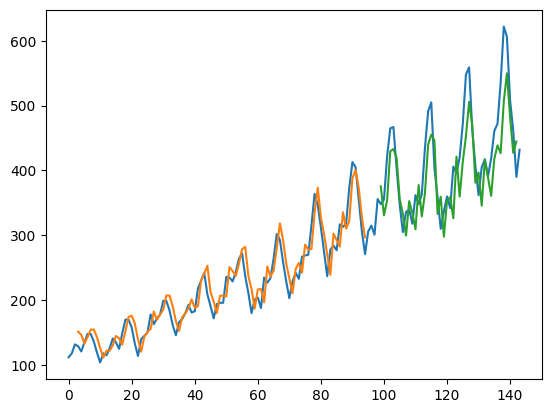

In [4]:
# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(InputLayer(batch_input_shape=(batch_size, look_back, 1)))
model.add(LSTM(4, stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	# model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
# model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Stacked LSTMs with Memory Between Batches

92/92 - 1s - 15ms/step - loss: 0.0052
92/92 - 0s - 2ms/step - loss: 0.0184
92/92 - 0s - 2ms/step - loss: 0.0141
92/92 - 0s - 2ms/step - loss: 0.0113
92/92 - 0s - 2ms/step - loss: 0.0098
92/92 - 0s - 2ms/step - loss: 0.0089
92/92 - 0s - 2ms/step - loss: 0.0084
92/92 - 0s - 2ms/step - loss: 0.0080
92/92 - 0s - 2ms/step - loss: 0.0077
92/92 - 0s - 2ms/step - loss: 0.0074
92/92 - 0s - 2ms/step - loss: 0.0072
92/92 - 0s - 2ms/step - loss: 0.0070
92/92 - 0s - 2ms/step - loss: 0.0068
92/92 - 0s - 2ms/step - loss: 0.0066
92/92 - 0s - 2ms/step - loss: 0.0064
92/92 - 0s - 2ms/step - loss: 0.0063
92/92 - 0s - 2ms/step - loss: 0.0061
92/92 - 0s - 2ms/step - loss: 0.0060
92/92 - 0s - 2ms/step - loss: 0.0059
92/92 - 0s - 2ms/step - loss: 0.0058
92/92 - 0s - 2ms/step - loss: 0.0057
92/92 - 0s - 2ms/step - loss: 0.0056
92/92 - 0s - 2ms/step - loss: 0.0055
92/92 - 0s - 2ms/step - loss: 0.0054
92/92 - 0s - 2ms/step - loss: 0.0053
92/92 - 0s - 2ms/step - loss: 0.0052
92/92 - 0s - 2ms/step - loss: 0.0051


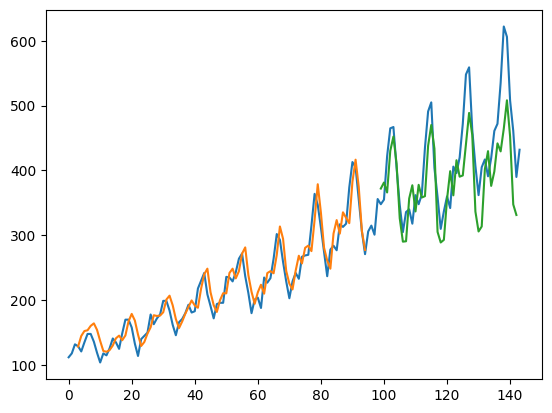

In [7]:
# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(InputLayer(batch_input_shape=(batch_size, look_back, 1)))
model.add(LSTM(4, stateful=True, return_sequences=True))
model.add(LSTM(4, stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	# model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
# model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()